<div style="background-color:maroon; padding:10px;">
</div>

# AM 205 - Advanced Scientific Computing: Numerical Methods
<div style="background-color:maroon; padding:10px;">
</div>

**Harvard University**<br/>
**Fall 2024**<br/>
**Instructors**: Prof. Nick Trefethen<br/>
**Author**: Elaine Swanson

### 1. **p9_QRfact.m** - QR factorization
#### This code performs a series of matrix operations using QR decomposition, which is an algorithm for decomposing a matrix into an orthogonal matrix $Q$ and an upper triangular matrix $R$.
The Matlab code is much simpler than this. 

In [3]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import time

Matrix A:
 [[  1   4   9]
 [ 16  25  36]
 [ 49  64  81]
 [100 121 144]
 [169 196 225]
 [256 289 324]
 [361 400 441]]
Full QR Decomposition:
Q:

 [[-0.00205379 -0.17154916  0.85584545]
 [-0.03286065 -0.41619023  0.33379658]
 [-0.10063575 -0.52450588 -0.02191594]
 [-0.20537908 -0.49649613 -0.21129211]
 [-0.34709065 -0.33216097 -0.23433194]
 [-0.52577045 -0.03150039 -0.09103543]
 [-0.74141848  0.40548559  0.21859743]]
R:

 [[-486.90450809 -548.66610508 -614.33811975]
 [   0.          -16.7482876   -36.63040954]
 [   0.            0.            1.69932806]]
Economy-Sized QR Decomposition:
Q (economic):

 [[-0.00205379 -0.17154916  0.85584545]
 [-0.03286065 -0.41619023  0.33379658]
 [-0.10063575 -0.52450588 -0.02191594]
 [-0.20537908 -0.49649613 -0.21129211]
 [-0.34709065 -0.33216097 -0.23433194]
 [-0.52577045 -0.03150039 -0.09103543]
 [-0.74141848  0.40548559  0.21859743]]
R (economic):

 [[-486.90450809 -548.66610508 -614.33811975]
 [   0.          -16.7482876   -36.63040954]
 [   0.     

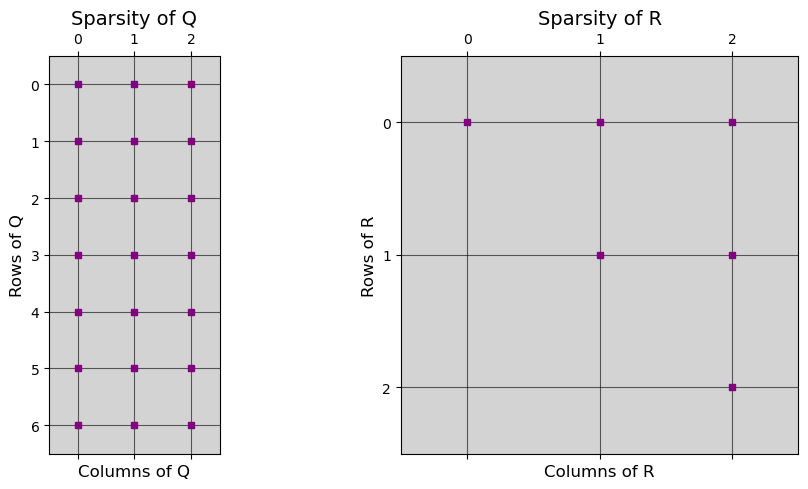

In [5]:
## create matrix A and reshape it
A = np.reshape(np.arange(1, 22)**2, (7, 3))
print("Matrix A:\n", A)

## full QR decomp 
Q, R = np.linalg.qr(A)
print("Full QR Decomposition:")
print("Q:\n\n", Q)
print("R:\n\n", R)

## (skinny) QR decomp
Q_econ, R_econ = la.qr(A, mode='economic')
print("Economy-Sized QR Decomposition:")
print("Q (economic):\n\n", Q_econ)
print("R (economic):\n\n", R_econ)

## viz of sparsity pattern of Q and R using spy
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.spy(Q_econ, markersize=5, color='purple')  
plt.title('Sparsity of Q', fontsize=14)
plt.xlabel('Columns of Q', fontsize=12)
plt.ylabel('Rows of Q', fontsize=12)
plt.grid(True, color='black', linestyle='-', alpha=0.6)  
plt.gca().set_facecolor('lightgray')  


plt.subplot(122)
plt.spy(R_econ, markersize=5, color='purple')  
plt.title('Sparsity of R', fontsize=14)
plt.xlabel('Columns of R', fontsize=12)
plt.ylabel('Rows of R', fontsize=12)
plt.grid(True, color='black', linestyle='-', alpha=0.6)  
plt.gca().set_facecolor('lightgray')  

plt.tight_layout()
plt.show()

In [7]:
## norm calc for columns of A and R
## round these 
print("Norm of first column of A:", np.linalg.norm(A[:, 0]))
print("Norm of second column of A:", np.linalg.norm(A[:, 1]))
print("Norm of second column of R:", np.linalg.norm(R_econ[:, 1]))

Norm of first column of A: 486.9045080916791
Norm of second column of A: 548.9216701861933
Norm of second column of R: 548.9216701861934


In [8]:
## orthogonality check for Q'*Q and Q*Q'
Q_t_Q = np.dot(Q_econ.T, Q_econ)
Q_Q_t = np.dot(Q_econ, Q_econ.T)
print("Q'*Q:\n", Q_t_Q)
print("Q*Q':\n", Q_Q_t)

## rank of Q*Q'
rank_Q_Q_t = np.linalg.matrix_rank(Q_Q_t)
print("Rank of Q*Q':", rank_Q_Q_t)

Q'*Q:
 [[ 1.00000000e+00 -3.43644783e-17 -1.85701952e-16]
 [-3.43644783e-17  1.00000000e+00  2.37226630e-17]
 [-1.85701952e-16  2.37226630e-17  1.00000000e+00]]
Q*Q':
 [[ 7.61904762e-01  3.57142857e-01  7.14285714e-02 -9.52380952e-02
  -1.42857143e-01 -7.14285714e-02  1.19047619e-01]
 [ 3.57142857e-01  2.85714286e-01  2.14285714e-01  1.42857143e-01
   7.14285714e-02 -8.71893456e-15 -7.14285714e-02]
 [ 7.14285714e-02  2.14285714e-01  2.85714286e-01  2.85714286e-01
   2.14285714e-01  7.14285714e-02 -1.42857143e-01]
 [-9.52380952e-02  1.42857143e-01  2.85714286e-01  3.33333333e-01
   2.85714286e-01  1.42857143e-01 -9.52380952e-02]
 [-1.42857143e-01  7.14285714e-02  2.14285714e-01  2.85714286e-01
   2.85714286e-01  2.14285714e-01  7.14285714e-02]
 [-7.14285714e-02 -8.71893456e-15  7.14285714e-02  1.42857143e-01
   2.14285714e-01  2.85714286e-01  3.57142857e-01]
 [ 1.19047619e-01 -7.14285714e-02 -1.42857143e-01 -9.52380952e-02
   7.14285714e-02  3.57142857e-01  7.61904762e-01]]
Rank of Q*Q'

In [9]:
## QR decomp of a large matrix
A_large = np.random.randn(10000, 1000)
start_time = time.time()
Q_large, R_large = la.qr(A_large, mode='economic')
end_time = time.time()
print("Time for QR decomposition on large matrix: {:.2f} seconds".format(end_time - start_time))

## max error in orthogonality (Q'*Q should be close to identity)
error = np.max(np.abs(np.dot(Q_large.T, Q_large) - np.eye(1000)))
print("Maximum error in orthogonality (Q'*Q - I):", error)

Time for QR decomposition on large matrix: 3.58 seconds
Maximum error in orthogonality (Q'*Q - I): 8.881784197001252e-16
